In [26]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.models_prediction.recs_interface import RecsInterface
from hnmchallenge.datasets.all_items_last_month_last_week import AILMLWDataset
from hnmchallenge.datasets.all_items_last_month_last_2nd_week import AILML2WDataset
from hnmchallenge.datasets.all_items_last_month_last_3rd_week import AILML3WDataset
from hnmchallenge.datasets.last_month_last_week_dataset import LMLWDataset
from hnmchallenge.constant import *

In [27]:
dataset = AILMLWDataset()
articles_df = dataset.get_articles_df()
fd = dataset.get_full_data()
customers_df=dataset.get_customers_df()

In [28]:
t_dat = fd["t_dat"].max()
t_dat1=t_dat - pd.to_timedelta(7, unit="D")
fd1 = fd[(fd["t_dat"] >= t_dat1) & (fd["t_dat"] <= t_dat)]
article_list = list(fd1["article_id"])
article_list=list(dict.fromkeys(article_list))
size=len(article_list)
filtered=fd[fd['article_id'].isin(article_list)]
filtered=filtered[filtered["t_dat"]<t_dat1]
filtered=filtered.sort_values(by=['t_dat'], ascending=False).reset_index()
filtered1=filtered.drop_duplicates("article_id")
filtered2=filtered1.groupby('t_dat')['article_id'].count().reset_index(name="counts")
filtered2["percentage"]=filtered2.loc[::-1,"counts"].cumsum()[::-1]
filtered2["percentage"]=filtered2["percentage"]/size
filtered2["diff"]=(filtered2["t_dat"]-t_dat1).dt.days
#filtered2.plot(x="t_dat", y=["percentage"],figsize=(10, 5),grid=True)
#plt.show()

In [29]:
fd1=fd[fd["t_dat"]<="15-09-2020"]
t_dat = fd1["t_dat"].max()
t_dat1=t_dat - pd.to_timedelta(7, unit="D")
fd1 = fd1[(fd1["t_dat"] >= t_dat1) & (fd1["t_dat"] <= t_dat)]
article_list = list(fd1["article_id"])
article_list=list(dict.fromkeys(article_list))
size=len(article_list)
filtered=fd[fd['article_id'].isin(article_list)]
filtered=filtered[filtered["t_dat"]<t_dat1]
filtered=filtered.sort_values(by=['t_dat'], ascending=False).reset_index()
filtered1=filtered.drop_duplicates("article_id")
filtered21=filtered1.groupby('t_dat')['article_id'].count().reset_index(name="counts")
filtered21["percentage"]=filtered21.loc[::-1,"counts"].cumsum()[::-1]
filtered21["percentage"]=filtered21["percentage"]/size
filtered21["diff"]=(filtered21["t_dat"]-t_dat1).dt.days
filtered3=filtered21
#filtered2.plot(x="t_dat", y=["percentage"],figsize=(10, 5),grid=True)
#plt.show()

/home/aayush/.cache/pypoetry/virtualenvs/hnmchallenge-2TdcNkYi-py3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning:

Parsing '15-09-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [30]:
fd2=fd[fd["t_dat"]<="09-08-2020"]
t_dat = fd2["t_dat"].max()
t_dat1=t_dat - pd.to_timedelta(7, unit="D")
fd2 = fd2[(fd2["t_dat"] >= t_dat1) & (fd2["t_dat"] <= t_dat)]
article_list = list(fd2["article_id"])
article_list=list(dict.fromkeys(article_list))
size=len(article_list)
filtered=fd[fd['article_id'].isin(article_list)]
filtered=filtered[filtered["t_dat"]<t_dat1]
filtered=filtered.sort_values(by=['t_dat'], ascending=False).reset_index()
filtered1=filtered.drop_duplicates("article_id")
filtered21=filtered1.groupby('t_dat')['article_id'].count().reset_index(name="counts")
filtered21["percentage"]=filtered21.loc[::-1,"counts"].cumsum()[::-1]
filtered21["percentage"]=filtered21["percentage"]/size
filtered21["diff"]=(filtered21["t_dat"]-t_dat1).dt.days
filtered4=filtered21

In [31]:
fd3=fd[fd["t_dat"]<="09-01-2020"]
t_dat = fd3["t_dat"].max()
t_dat1=t_dat - pd.to_timedelta(7, unit="D")
fd3 = fd3[(fd3["t_dat"] >= t_dat1) & (fd3["t_dat"] <= t_dat)]
article_list = list(fd3["article_id"])
article_list=list(dict.fromkeys(article_list))
size=len(article_list)
filtered=fd[fd['article_id'].isin(article_list)]
filtered=filtered[filtered["t_dat"]<t_dat1]
filtered=filtered.sort_values(by=['t_dat'], ascending=False).reset_index()
filtered1=filtered.drop_duplicates("article_id")
filtered21=filtered1.groupby('t_dat')['article_id'].count().reset_index(name="counts")
filtered21["percentage"]=filtered21.loc[::-1,"counts"].cumsum()[::-1]
filtered21["percentage"]=filtered21["percentage"]/size
filtered21["diff"]=(filtered21["t_dat"]-t_dat1).dt.days
filtered5=filtered21

In [32]:
fd4=fd[fd["t_dat"]<="08-25-2020"]
t_dat = fd4["t_dat"].max()
t_dat1=t_dat - pd.to_timedelta(7, unit="D")
fd4 = fd4[(fd4["t_dat"] >= t_dat1) & (fd4["t_dat"] <= t_dat)]
article_list = list(fd4["article_id"])
article_list=list(dict.fromkeys(article_list))
size=len(article_list)
filtered=fd[fd['article_id'].isin(article_list)]
filtered=filtered[filtered["t_dat"]<t_dat1]
filtered=filtered.sort_values(by=['t_dat'], ascending=False).reset_index()
filtered1=filtered.drop_duplicates("article_id")
filtered21=filtered1.groupby('t_dat')['article_id'].count().reset_index(name="counts")
filtered21["percentage"]=filtered21.loc[::-1,"counts"].cumsum()[::-1]
filtered21["percentage"]=filtered21["percentage"]/size
filtered21["diff"]=(filtered21["t_dat"]-t_dat1).dt.days
filtered6=filtered21

In [33]:
#142
filtered2=filtered2[142:]
filtered3=filtered3[152:]
filtered4=filtered4[159:]
filtered5=filtered5[172:]
filtered6=filtered6[169:]

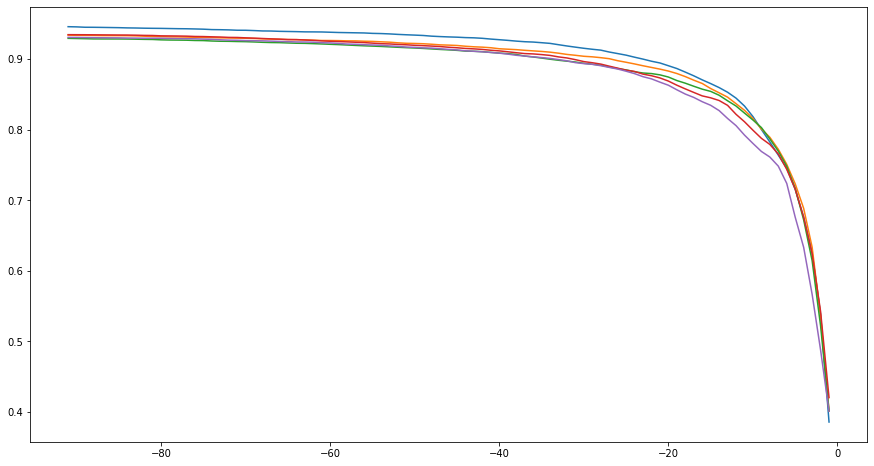

In [34]:
import seaborn as sns
X=list(filtered2["diff"])
y=list(filtered2["percentage"])
z=list(filtered3["percentage"])
a=list(filtered4["percentage"])
b=list(filtered5["percentage"])
c=list(filtered6["percentage"])
# plt.rcParams["figure.figsize"] = [20.50, 5.50]
# plt.rcParams["figure.autolayout"] = True
# plt.plot(X, z, color='g', label='09/09-15/09',linewidth=1)
# plt.plot(X, y, color='r', label='16/09-22/09',linewidth=1)

# plt.xlabel("t_dat")
# plt.ylabel("percentage")
# plt.title("articles over time")
# plt.legend()
# plt.show()
fig, ax = plt.subplots()

ax= sns.lineplot(x=X, y=y)
ax1 = sns.lineplot(x=X, y=z)
ax2 = sns.lineplot(x=X, y=a)
ax3 = sns.lineplot(x=X, y=b)
ax4 = sns.lineplot(x=X, y=c)



In [35]:
filtered2

,t_dat,counts,percentage,diff
142,2020-06-16,5,0.946104,-91
143,2020-06-17,10,0.945836,-90
144,2020-06-18,1,0.945301,-89
145,2020-06-19,3,0.945247,-88
146,2020-06-20,7,0.945087,-87
...,...,...,...,...
227,2020-09-10,737,0.715532,-5
228,2020-09-11,941,0.676086,-4
229,2020-09-12,1633,0.625723,-3
230,2020-09-13,2852,0.538322,-2


In [36]:
final_df=pd.concat([filtered2,filtered3],ignore_index=True)
final_df=pd.concat([final_df,filtered4],ignore_index=True)
final_df=pd.concat([final_df,filtered5],ignore_index=True)
final_df=pd.concat([final_df,filtered6],ignore_index=True)

In [37]:
final_df

,t_dat,counts,percentage,diff
0,2020-06-16,5,0.946104,-91
1,2020-06-17,10,0.945836,-90
2,2020-06-18,1,0.945301,-89
3,2020-06-19,3,0.945247,-88
4,2020-06-20,7,0.945087,-87
...,...,...,...,...
445,2020-08-13,888,0.676031,-5
446,2020-08-14,1382,0.633316,-4
447,2020-08-15,1642,0.566838,-3
448,2020-08-16,1807,0.487854,-2


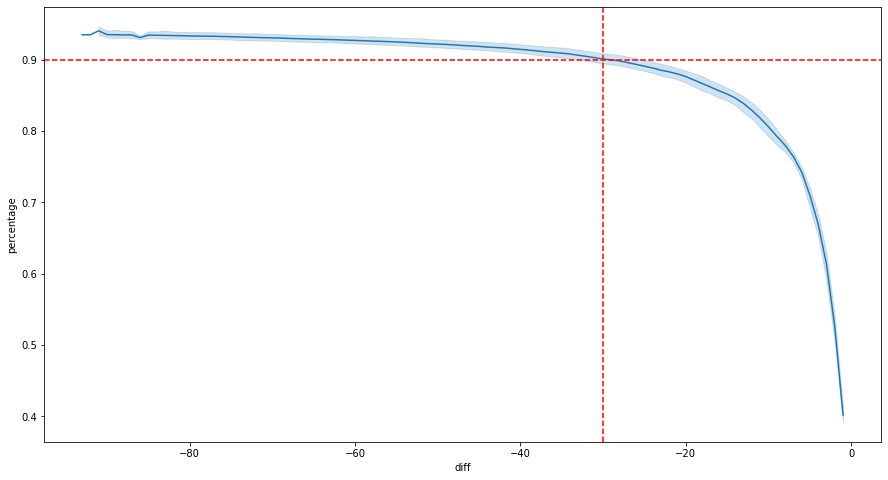

In [38]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
graph=sns.lineplot(data=final_df, x="diff", y="percentage")
graph.axhline(0.9, ls='--',c='red')
graph.axvline(-30, ls='--',c='red')
plt.show()

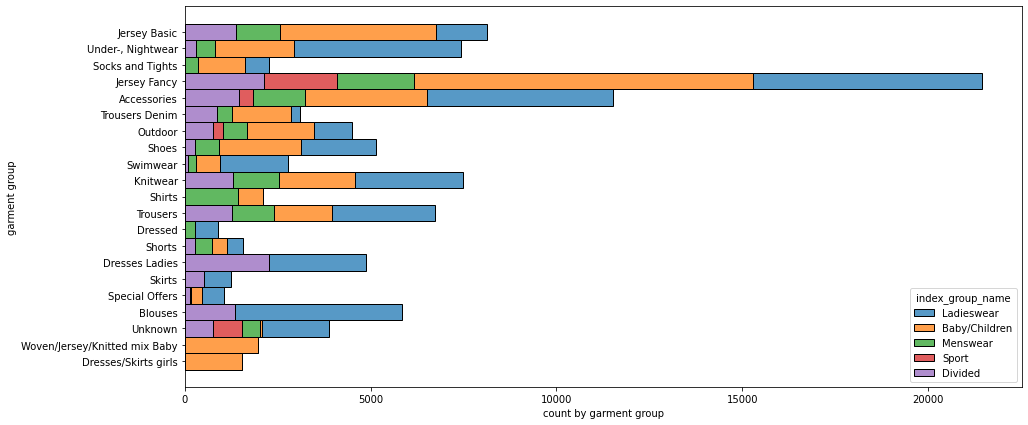

In [39]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles_df, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [40]:
combined = fd.merge(articles_df, on='article_id', how='left')

In [41]:
combined['channel'] = ''

combined.loc[combined.sales_channel_id==1, 'channel'] = 'store'
combined.loc[combined.sales_channel_id==2, 'channel'] = 'online'

In [43]:
import plotly.express as px
color = px.colors.qualitative.Pastel
group="garment_group_name"
com_g = combined[['article_id', 'channel', group]].groupby([group, "channel"]).count().reset_index()
fig = px.bar(com_g, x=group, y='article_id', color='channel', barmode='group',
                 labels={'article_id': 'sales_quantity'}, title='Sales (Quantity) by ' + group, color_discrete_sequence=color,
                 width=1000, height=500)
fig.show()

In [54]:
df_trans=fd
df_trans['article_id']=df_trans['article_id'].map(str)
df_article=articles_df
df_article['article_id']=df_article['article_id'].map(str)
df_trans['t_dat'] = pd.to_datetime(df_trans['t_dat'])
df_trans = df_trans[df_trans['t_dat'] >= pd.to_datetime('2020-07-01')]
#df_article = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv',dtype={'article_id': str})

df_article['idxgrp_idx_prdtyp'] = df_article['index_group_name'] + '_' + df_article['index_name'] + '_' + df_article['product_type_name']

df = pd.merge(
    df_trans,
    df_article,
    on='article_id',
    how='left'
)
df['product_code'] = df['product_code'].astype(str)
df['num_week'] = df['t_dat'].dt.isocalendar().week
df['product_code'] = df['product_code'].astype(str)

In [55]:
def do_customers_purchase_same_AGGKEY(df, agg_key):
    dfagg = df.groupby(['num_week','customer_id'])[[agg_key]].agg({
            agg_key: lambda x: ','.join(x)
    }).reset_index().rename(columns={agg_key: 'purchased_set'})
    dfagg['num_2wk_before'] = dfagg['num_week'] + 2
    dfagg = pd.merge(
        dfagg[['num_week','customer_id','purchased_set']],
        dfagg.rename(columns={'purchased_set': '2wk_before_purchased_set'})[['num_2wk_before','customer_id','2wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_2wk_before', 'customer_id'],
        how='left'
    )
    dfagg['num_1wk_before'] = dfagg['num_week'] + 1
    dfagg = pd.merge(
        dfagg,
        dfagg.rename(columns={'purchased_set': '1wk_before_purchased_set'})[['num_1wk_before','customer_id','1wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_1wk_before', 'customer_id'],
        how='left'
    )
    dfagg['num_3wk_before'] = dfagg['num_week'] + 3
    dfagg = pd.merge(
        dfagg,
        dfagg.rename(columns={'purchased_set': '3wk_before_purchased_set'})[['num_3wk_before','customer_id','3wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_3wk_before', 'customer_id'],
        how='left'

    )
    dfagg = dfagg[['num_week','customer_id','purchased_set','1wk_before_purchased_set','2wk_before_purchased_set','3wk_before_purchased_set']]
    for col in ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']:
        dfagg[col] = dfagg[col].fillna('')
        dfagg[col] = dfagg[col].str.split(',')
    dfagg['2wk_before_purchased_set'] = dfagg['2wk_before_purchased_set'] + dfagg['1wk_before_purchased_set']
    dfagg['3wk_before_purchased_set'] = dfagg['3wk_before_purchased_set'] + dfagg['2wk_before_purchased_set']
    for col in ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']:
        dfagg[col] = dfagg[col].map(set)

    dfagg['is_purchased_same_within_1wk'] = (dfagg['purchased_set'] & dfagg['1wk_before_purchased_set']).astype(int)
    dfagg['is_purchased_same_within_2wk'] = (dfagg['purchased_set'] & dfagg['2wk_before_purchased_set']).astype(int)
    dfagg['is_purchased_same_within_3wk'] = (dfagg['purchased_set'] & dfagg['3wk_before_purchased_set']).astype(int)
    print(
        len(dfagg[dfagg['is_purchased_same_within_3wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
        len(dfagg[dfagg['is_purchased_same_within_2wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
        len(dfagg[dfagg['is_purchased_same_within_1wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100
    )
    df_vis = pd.DataFrame({
        'Period': ['Within_1wk', 'Within_2wk', 'Within_3wk'],
        'Ratio': [len(dfagg[dfagg['is_purchased_same_within_1wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
                  len(dfagg[dfagg['is_purchased_same_within_2wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
                  len(dfagg[dfagg['is_purchased_same_within_3wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100]
    })
    fig = px.bar(df_vis, x='Period', y='Ratio')
    fig.show()
    return dfagg

In [56]:
dfagg_article = do_customers_purchase_same_AGGKEY(df, 'article_id')

6.643407353238566 6.154185552943195 5.093013422448641


In [57]:
dfagg_prdcd = do_customers_purchase_same_AGGKEY(df, 'product_code')

9.381619559067149 8.480797789003438 6.767806550056889


In [58]:
dfagg_idxgrp_idx_prdtyp = do_customers_purchase_same_AGGKEY(df, 'idxgrp_idx_prdtyp')

16.5346755101082 14.338590510118415 10.800260645936191


In [59]:
dfagg = df.sort_values("t_dat")\
        .set_index('t_dat')\
        .groupby(['customer_id','product_code'])\
        .rolling("21d")[["price"]]\
        .count()\
        .reset_index()\
        .rename(columns={'price': 'num_purchased_same_article'})
dfagg['is_purchased_same_prdcd_within_3wk'] = (dfagg['num_purchased_same_article'] > 1).astype(int)
dfagg = dfagg[dfagg['t_dat'] > '2020-09-01']
dfagg = pd.merge(
    dfagg,
    df.groupby(['idxgrp_idx_prdtyp','product_code'])[[]].count().reset_index(),
    on='product_code'
)

In [60]:
from sklearn.linear_model import LogisticRegression
dftrain = pd.get_dummies(dfagg[['idxgrp_idx_prdtyp']], drop_first=True)
dftrain['is_purchased_same_prdcd_within_3wk'] = dfagg['is_purchased_same_prdcd_within_3wk']
dftrain_partial = dftrain.sample(frac=0.01, random_state=0)
dftrain_partial = dftrain_partial.dropna()
feature_cols = [col for col in dftrain.columns if col not in ['is_purchased_same_prdcd_within_3wk']]
model = LogisticRegression(C=5.0, penalty="l1", tol=0.01, solver="saga")
model.fit(dftrain_partial[feature_cols], dftrain_partial['is_purchased_same_prdcd_within_3wk'])
df_coef = pd.DataFrame(
        model.coef_,
        index=['coefficient'],
        columns=feature_cols).T.reset_index()
df_coef['index'] = df_coef['index'].str.replace('idxgrp_idx_prdtyp_', '')

In [61]:
px.bar(df_coef.sort_values(by='coefficient', ascending=False)[:15], x='index', y='coefficient')